# Convulational Network to predict the probability of having Sagging eye syndrome (SES)

We import the libraries that we will use to build the model.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

import os, shutil
import random
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-04-05 19:47:00.169354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 19:47:00.248959: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-05 19:47:00.269388: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-05 19:47:00.685021: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

The following code block is responsible for preparing the training and validation data. The first step is to define the paths for the training and validation directories for both the positive and negative categories. Then, we create these directories using the os.makedirs() function, which ensures that the directories are created only if they don't already exist.

Next, we create lists of filenames for the images in the positive and negative directories, respectively. These filenames are used to split the data into training and validation sets. Specifically, the train_test_split() function is used to randomly split the list of filenames into a training set (80% of the data) and a validation set (20% of the data).

Then we use the shutil library to copy the images from the original directories to the newly created training and validation directories. Finally, we print out the number of images in each of the four resulting directories to confirm that the data has been split correctly.

This preprocessing step is an essential part of the deep learning workflow, as it ensures that the model has access to properly labeled and organized data for training and evaluation. By splitting the data into training and validation sets, the model can be trained on one set and evaluated on another to ensure that it is able to generalize to new, unseen data.

In [3]:
negative_dir = "/home/pabloperez/Repositorios/estrabismo/photos/negative"
positive_dir = "/home/pabloperez/Repositorios/estrabismo/photos/positive"
train_dir = os.path.join("/home/pabloperez/Repositorios/estrabismo/ModelSample/train")
validation_dir = os.path.join("/home/pabloperez/Repositorios/estrabismo/ModelSample/validation")

In [4]:
'''
negative_train_dir = os.path.join(train_dir, "negative")
negative_validation_dir = os.path.join(validation_dir, "negative")
positive_train_dir = os.path.join(train_dir, "positive")
positive_validation_dir = os.path.join(validation_dir, "positive")

os.makedirs(negative_train_dir, exist_ok=True)
os.makedirs(negative_validation_dir, exist_ok=True)
os.makedirs(positive_train_dir, exist_ok=True)
os.makedirs(positive_validation_dir, exist_ok=True)


# Lista de nombres de archivo de las imágenes en los directorios "negative" y "positive"
negative_files = [os.path.join(negative_dir, f) for f in os.listdir(negative_dir) if os.path.isfile(os.path.join(negative_dir, f))]
positive_files = [os.path.join(positive_dir, f) for f in os.listdir(positive_dir) if os.path.isfile(os.path.join(positive_dir, f))]

# Dividir la lista de nombres de archivo en conjuntos de entrenamiento y validación
negative_train_files, negative_validation_files = train_test_split(negative_files, test_size=0.2)
positive_train_files, positive_validation_files = train_test_split(positive_files, test_size=0.2)

# Copiar imágenes de negative al directorio de entrenamiento
for filename in negative_train_files:
    destination = os.path.join(negative_train_dir, os.path.basename(filename))
    shutil.copy(filename, destination)

# Copiar imágenes de negative al directorio de validación
for filename in negative_validation_files:
    destination = os.path.join(negative_validation_dir, os.path.basename(filename))
    shutil.copy(filename, destination)

# Copiar imágenes de positive al directorio de entrenamiento
for filename in positive_train_files:
    destination = os.path.join(positive_train_dir, os.path.basename(filename))
    shutil.copy(filename, destination)

# Copiar imágenes de positive al directorio de validación
for filename in positive_validation_files:
    destination = os.path.join(positive_validation_dir, os.path.basename(filename))
    shutil.copy(filename, destination)
    
print("Número de imágenes de entrenamiento en negative: ", len(negative_train_files))
print("Número de imágenes de validación en negative: ", len(negative_validation_files))
print("Número de imágenes de entrenamiento en positive: ", len(positive_train_files))
print("Número de imágenes de validación en positive: ", len(positive_validation_files))
'''

'\nnegative_train_dir = os.path.join(train_dir, "negative")\nnegative_validation_dir = os.path.join(validation_dir, "negative")\npositive_train_dir = os.path.join(train_dir, "positive")\npositive_validation_dir = os.path.join(validation_dir, "positive")\n\nos.makedirs(negative_train_dir, exist_ok=True)\nos.makedirs(negative_validation_dir, exist_ok=True)\nos.makedirs(positive_train_dir, exist_ok=True)\nos.makedirs(positive_validation_dir, exist_ok=True)\n\n\n# Lista de nombres de archivo de las imágenes en los directorios "negative" y "positive"\nnegative_files = [os.path.join(negative_dir, f) for f in os.listdir(negative_dir) if os.path.isfile(os.path.join(negative_dir, f))]\npositive_files = [os.path.join(positive_dir, f) for f in os.listdir(positive_dir) if os.path.isfile(os.path.join(positive_dir, f))]\n\n# Dividir la lista de nombres de archivo en conjuntos de entrenamiento y validación\nnegative_train_files, negative_validation_files = train_test_split(negative_files, test_size=0

This code defines a convolutional neural network (CNN) model for image classification. The model consists of several layers of convolutional and pooling operations followed by fully connected layers.

The first layer is a 2D convolutional layer with 32 filters, each of size 3x3, and the ReLU activation function. This layer takes input images of size 300x300 with 3 color channels. The second layer is a max pooling layer with a pool size of 2x2. This layer reduces the dimensionality of the output from the previous layer. The third and fourth layers are similar to the first two layers but with 64 and 128 filters, respectively.

After the fourth convolutional layer, another max pooling layer is added. Then, the output from the last pooling layer is flattened into a vector and passed through a dropout layer to reduce overfitting. The dropout rate is set to 0.5, which means that 50% of the neurons in the layer are randomly dropped out during training.

Two fully connected layers are added after the dropout layer. The first fully connected layer has 512 neurons with ReLU activation function. The last layer has a single neuron with sigmoid activation function, which is used to predict the binary classification output.

Finally, the model is compiled with the binary cross-entropy loss function, RMSprop optimizer with a learning rate of 0.0001, and accuracy metric.

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Es para evitar overfitting
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=0.0001),
              metrics=['acc'])

2023-04-05 19:47:01.450125: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 19:47:01.453682: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 19:47:01.453789: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 19:47:01.454295: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

The model.summary output displays a summary of the model architecture, including the type and shape of each layer and the number of trainable parameters. The total number of trainable parameters in the model is 17,019,073, and all parameters are trainable since there are no non-trainable layers in the architecture.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

We create two instances of the ImageDataGenerator class, train_datagen and test_datagen, to generate image data. Both genrerators rescale the image pixel values by dividing them by 255. Data augmentation tests were performed, but the results did not improve the model. Therefore, it was decided to implement these techniques in the save_sq.py script for the negative category, which has few observations. We use the flow_from_directory method to create two generator objects, train_generator and validation_generator, which read images from the specified directories and produce batches of images for model training and validation.

The model.fit_generator method is then used to fit the model to the training data, using the train_generator object to supply the data in batches. The model is trained for 30 epochs and the validation data is provided by the validation_generator object.

In [7]:
import datetime
n = datetime.datetime.now()
print(f'Hora de inicio de celda: {n}')
train_datagen = ImageDataGenerator(
    rescale=1./255)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(300, 300),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      epochs=30,#30,
      validation_data=validation_generator)

nf = datetime.datetime.now()
print(f'Hora de final de celda: {nf}')
print(f'Tiempo total: {nf-n}')

Hora de inicio de celda: 2023-04-05 19:47:01.966671
Found 301 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


/tmp/ipykernel_67912/907069615.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30


2023-04-05 19:47:03.439988: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-04-05 19:47:04.695330: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


10/10 [==============================] - 7s 398ms/step - loss: 0.7414 - acc: 0.6047 - val_loss: 0.6576 - val_acc: 0.6364
Epoch 2/30
10/10 [==============================] - 3s 346ms/step - loss: 0.6516 - acc: 0.6678 - val_loss: 0.6458 - val_acc: 0.7792
Epoch 3/30
10/10 [==============================] - 3s 346ms/step - loss: 0.6948 - acc: 0.6910 - val_loss: 0.6044 - val_acc: 0.7662
Epoch 4/30
10/10 [==============================] - 3s 345ms/step - loss: 0.6010 - acc: 0.7010 - val_loss: 0.5596 - val_acc: 0.7273
Epoch 5/30
10/10 [==============================] - 3s 343ms/step - loss: 0.5723 - acc: 0.6844 - val_loss: 0.5189 - val_acc: 0.7662
Epoch 6/30
10/10 [==============================] - 3s 341ms/step - loss: 0.5661 - acc: 0.7209 - val_loss: 0.5095 - val_acc: 0.7662
Epoch 7/30
10/10 [==============================] - 3s 340ms/step - loss: 0.4772 - acc: 0.7874 - val_loss: 0.4933 - val_acc: 0.7662
Epoch 8/30
10/10 [==============================] - 3s 336ms/step - loss: 0.4451 - acc:

Se guarda el modelo en formato .hdf5

In [8]:
model.save('/home/pabloperez/Desktop/Version1.h5')

 The model makes predictions on the validation data, and these predicted probabilities are converted to binary labels using a threshold of 0.5. The true labels for the validation data (as the sample is very small we have no new data to correctly test our model predictions) are obtained from the generator. A confusion matrix is computed using the true labels and predicted binary labels. The class names are obtained from the generator and used as tick labels for the heatmap. Finally, the confusion matrix is plotted as a heatmap using the seaborn library. The plot shows the number of true positives, false positives, true negatives, and false negatives for each class. However, it is noted that the results may not be very reliable due to the small sample size.

3/3 [==============================] - 1s 201ms/step


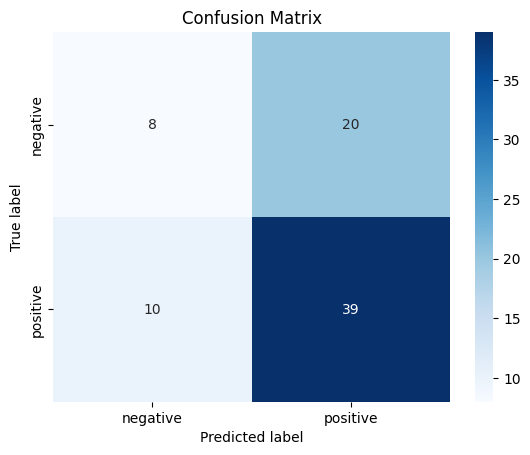

In [9]:
from sklearn.metrics import confusion_matrix

# Make predictions on validation data
validation_generator.reset()
y_pred = model.predict(validation_generator)

# Convert predicted probabilities to binary labels
y_pred_binary = y_pred > 0.5

# Get true labels for validation data
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Get labels for confusion matrix
class_names = validation_generator.class_indices.keys()

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Set plot labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show plot
plt.show()


Finally, we plot the training and validation accuracy and loss curves for a given model. The accuracy and loss values are extracted from the model's training history object.

However, the curves suggest that the model is overfitting, as the training accuracy and loss continue to improve while the validation accuracy and loss does not increase after 15 epochs. This indicates that the model is memorizing the training data rather than generalizing to new, unseen data.

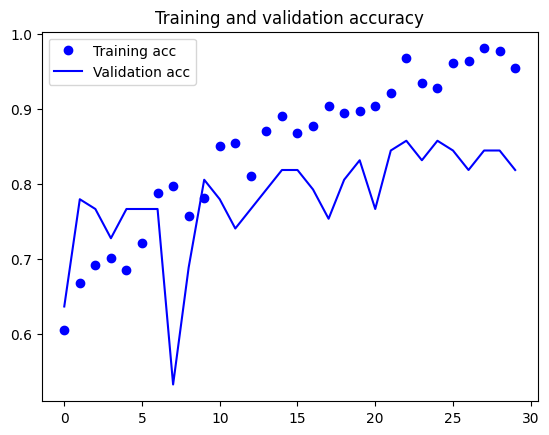

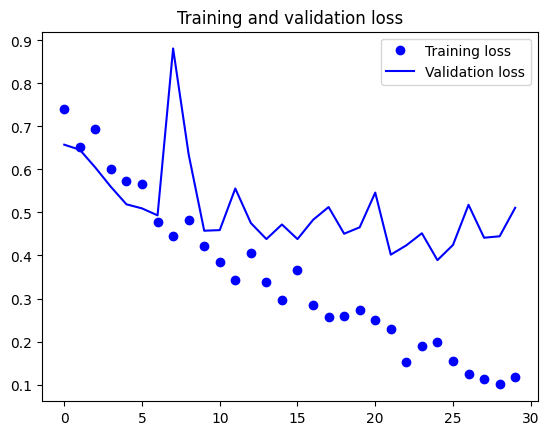

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()